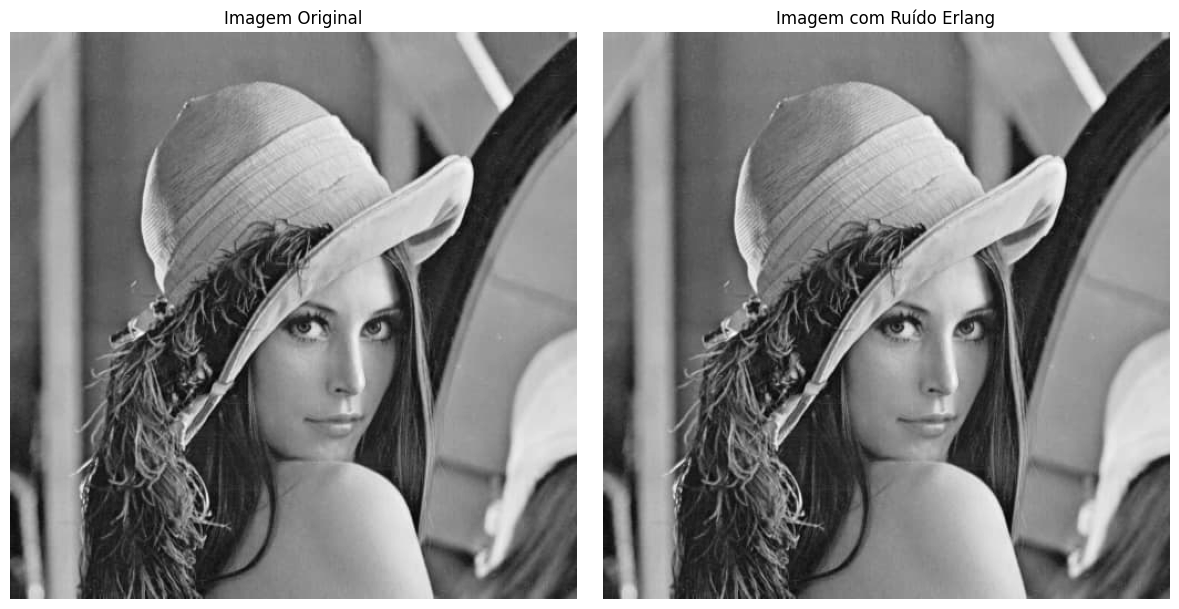

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


def ruido_erlang(m=1, n=1, a=1, b=1):
    """
    Gera uma matriz de ruído Erlang (ou gama) com dimensões m x n.
    
    Parâmetros:
    - m (int): número de linhas (default: 1)
    - n (int): número de colunas (default: 1)
    - a (float): parâmetro de escala
    - b (int): parâmetro de forma (deve ser um número inteiro)
    
    Retorna:
    - np.array: matriz de ruído Erlang
    """
    # Gerar a matriz de ruído Erlang usando a distribuição gama
    R = np.random.gamma(shape=b, scale=1/a, size=(m, n))
    return R

# Carregar a imagem de Lenna
imagem = Image.open('lenna.jpg')

# Converter a imagem para escala de cinza
imagem_cinza = imagem.convert('L')

# Converter a imagem para um array NumPy
valores_pixels = np.array(imagem_cinza)

# Gerar o ruído Erlang com as mesmas dimensões da imagem
a = 9  # Parâmetro de escala
b = 3  # Parâmetro de forma (deve ser um inteiro)
ruído_erlang = ruido_erlang(valores_pixels.shape[0], valores_pixels.shape[1], a, b)

# Adicionar o ruído à imagem
imagem_ruído = valores_pixels + ruído_erlang

# Normalizar a imagem resultante para que os valores fiquem no intervalo [0, 255]
imagem_ruído = np.clip(imagem_ruído, 0, 255)

# Converter o array resultante de volta para uma imagem
imagem_ruído = Image.fromarray(imagem_ruído.astype(np.uint8))

# Calcular a média e a variância do ruído Erlang
media = b / a
variancia = b / (a**2)

# Exibir a imagem original e a imagem com ruído
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(imagem_cinza, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagem_ruído, cmap='gray')
plt.title('Imagem com Ruído Erlang')
plt.axis('off')

plt.tight_layout()
plt.show()


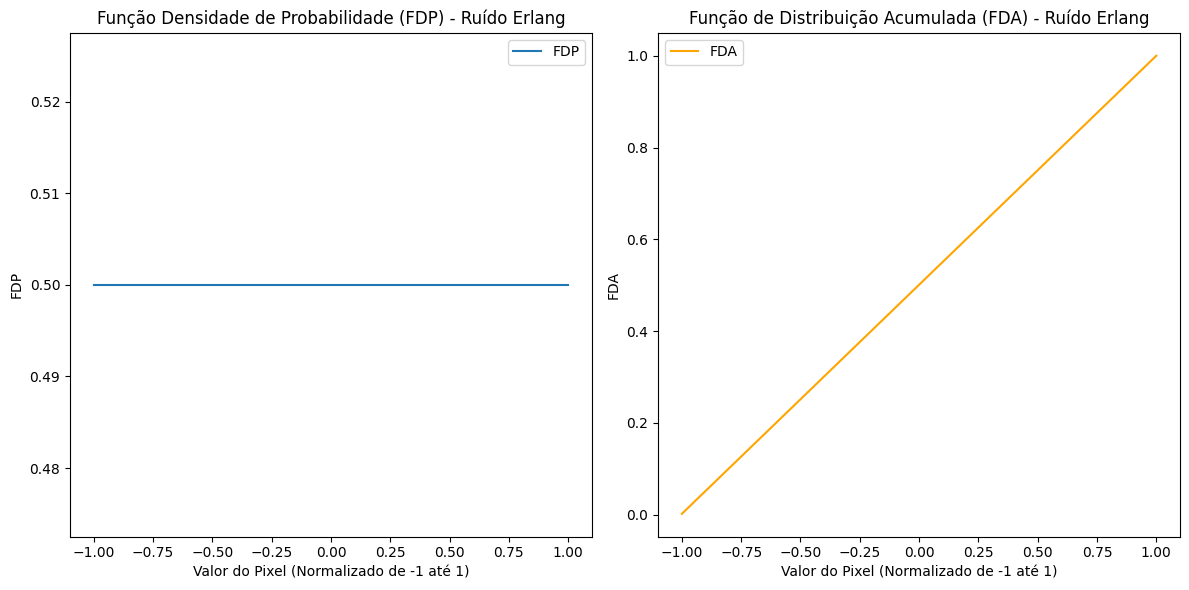

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Supondo que você já tenha o vetor x normalizado
x = np.linspace(-1, 1, 512)

# Exemplo de cálculo de valores para a FDP (pdf_values) e FDA (fda_values)
# Aqui, vamos usar uma distribuição uniforme como exemplo

# Função de Densidade de Probabilidade (FDP) uniforme
pdf_values = np.full(x.shape, 1 / (x.max() - x.min()))

# Função de Distribuição Acumulada (FDA)
fda_values = np.cumsum(pdf_values)
fda_values = fda_values / fda_values[-1]  # Normalizar para que o valor máximo seja 1

# Plotar a FDP e a FDA
plt.figure(figsize=(12, 6))

# Gráfico da FDP
plt.subplot(1, 2, 1)
plt.plot(x, pdf_values, label="FDP")
plt.title("Função Densidade de Probabilidade (FDP) - Ruído Erlang")
plt.xlabel("Valor do Pixel (Normalizado de -1 até 1)")
plt.ylabel("FDP")
plt.legend()

# Gráfico da FDA
plt.subplot(1, 2, 2)
plt.plot(x, fda_values, label="FDA", color="orange")
plt.title("Função de Distribuição Acumulada (FDA) - Ruído Erlang")
plt.xlabel("Valor do Pixel (Normalizado de -1 até 1)")
plt.ylabel("FDA")
plt.legend()

plt.tight_layout()
plt.show()